In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_train.shape

(10683, 11)

In [6]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

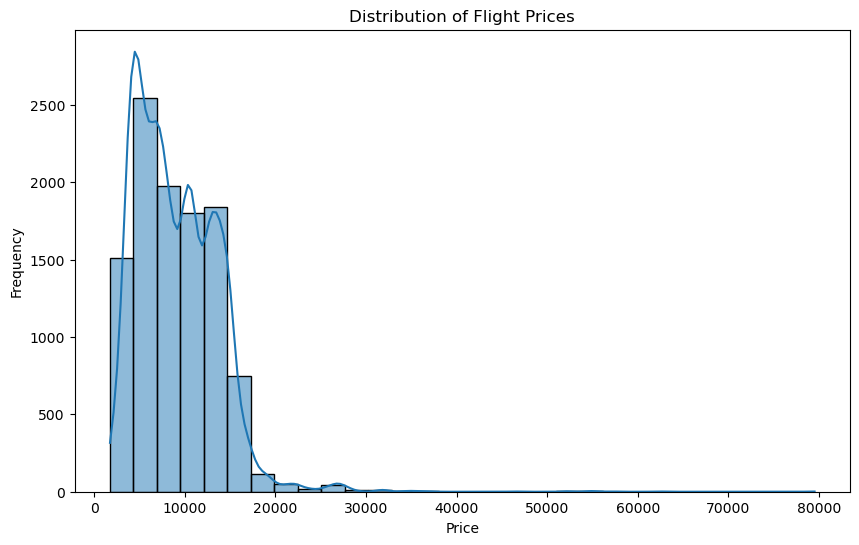

In [9]:
# Visualize the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [10]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [11]:
df_train.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [12]:
city_names = df_train.Destination.value_counts().index
city_count = df_train.Destination.value_counts().values

Text(0.5, 1.0, 'Distribution of the most headed destinations')

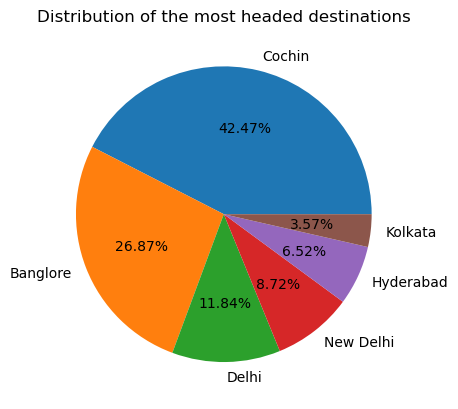

In [13]:
plt.pie(city_count, labels=city_names, autopct='%1.2f%%')
plt.title('Distribution of the most headed destinations')

In [14]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

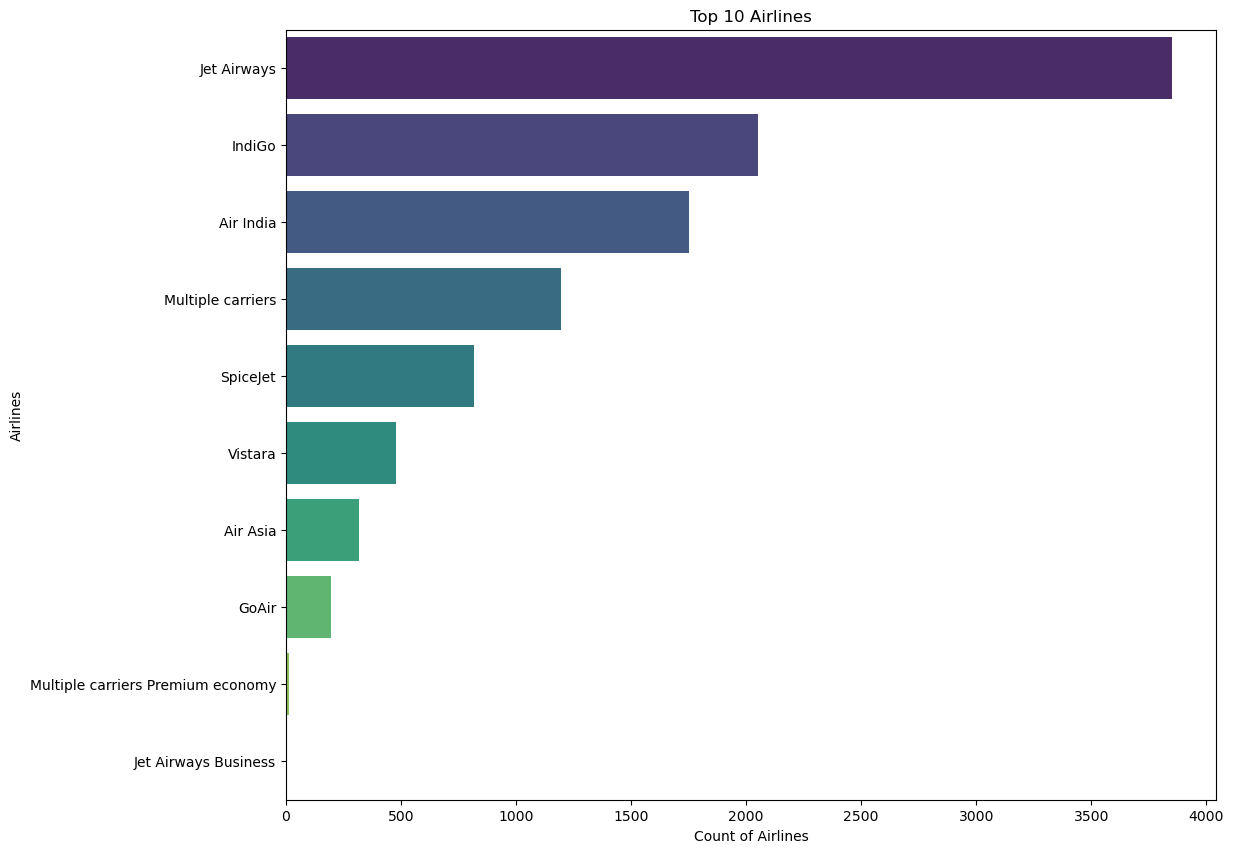

In [15]:
# Assuming you want to focus on the top 10 countries
airlines_counts = df_train['Airline'].value_counts().head(10)  

# Plotting the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=airlines_counts.values, y=airlines_counts.index, palette="viridis")
plt.xlabel('Count of Airlines')
plt.ylabel('Airlines')
plt.title('Top 10 Airlines')
plt.show()

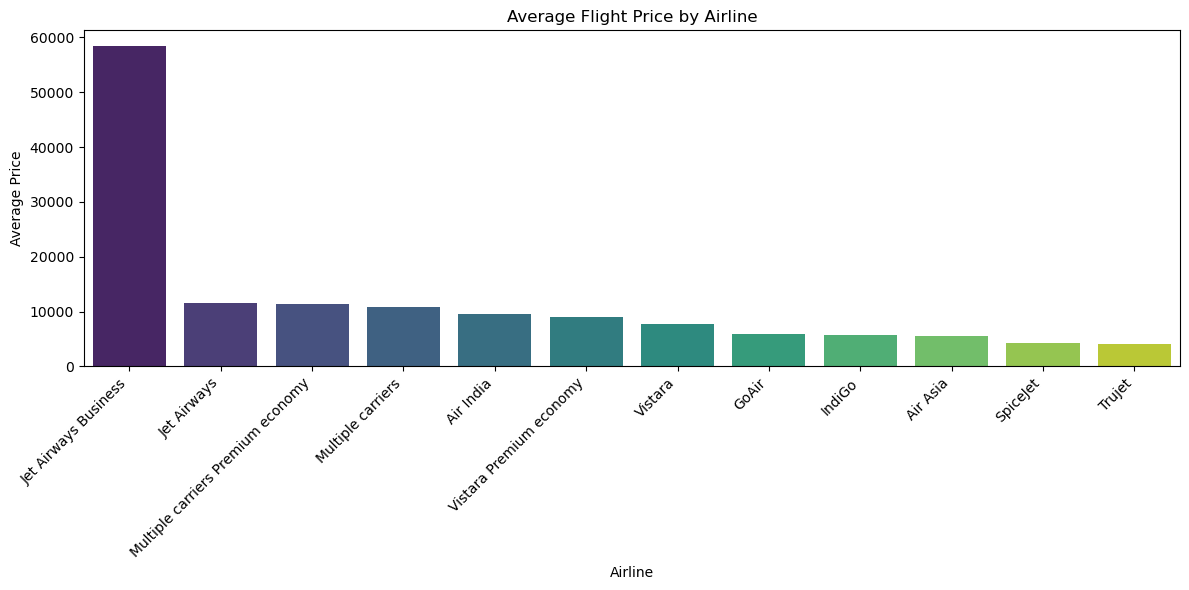

In [81]:
# Calculate the average price for each airline
average_prices = df_train.groupby('Airline')['Price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')
plt.title('Average Flight Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
airline_names = df_train.Airline.value_counts().index
airline_val = df_train.Airline.value_counts().values

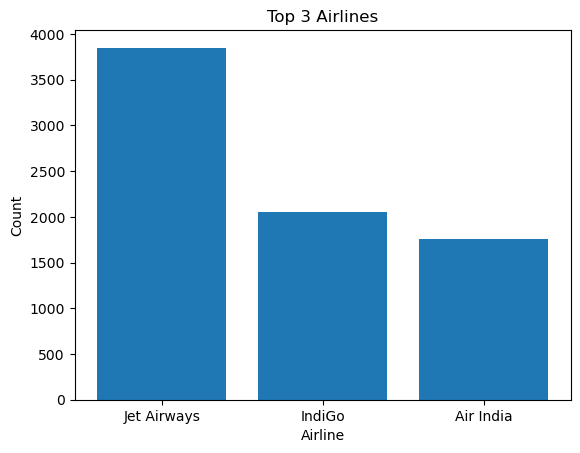

In [17]:
plt.bar(airline_names[:3], airline_val[:3])
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Top 3 Airlines')
plt.show()

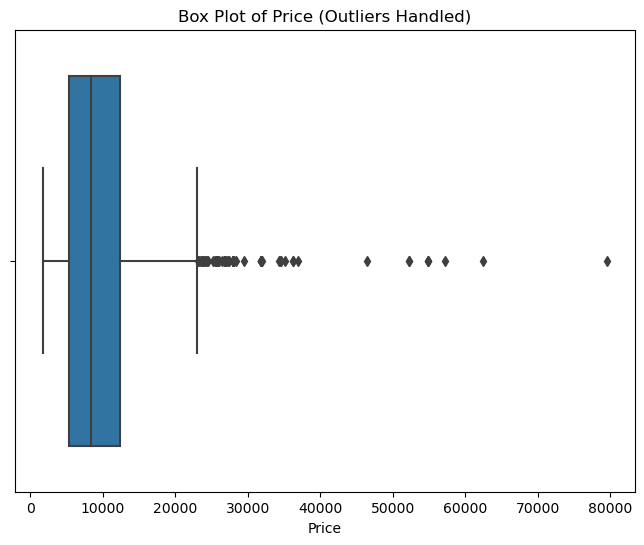

In [18]:
# Create a box plot for 'Price' after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price', data=df_train)
plt.title('Box Plot of Price (Outliers Handled)')
plt.xlabel('Price')
plt.show()

In [19]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [20]:
df_test.shape

(2671, 10)

In [21]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [22]:
final_df = pd.concat([df_train, df_test], ignore_index=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [23]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [24]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [26]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [27]:
final_df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
13349     6
13350    27
13351     6
13352     6
13353    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [28]:
##Fetaure Engineering Process
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

#df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
#df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
#df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [29]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [30]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.3+ MB


In [32]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [33]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019


In [34]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]
#final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [35]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019


In [36]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [37]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [38]:
final_df.drop('Arrival_Time', axis=1, inplace=True)

In [39]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25


In [40]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [41]:
final_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25


In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.2+ MB


In [43]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [44]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [45]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [46]:
final_df.drop('Route',axis=1,inplace=True)

In [47]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [48]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dept_hour        13354 non-null  int32  
 13  Dept_min         13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.1+ MB


In [50]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [51]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [52]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(13343,axis=0,inplace=True)

In [53]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

In [54]:
final_df.drop('Duration',axis=1,inplace=True)

In [55]:
final_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2


In [56]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [58]:
final_df.shape

(13352, 14)

In [59]:
final_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19


In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  int32  
 1   Source           13352 non-null  int32  
 2   Destination      13352 non-null  int32  
 3   Total_Stops      13351 non-null  float64
 4   Additional_Info  13352 non-null  int32  
 5   Price            10682 non-null  float64
 6   Date             13352 non-null  int32  
 7   Month            13352 non-null  int32  
 8   Year             13352 non-null  int32  
 9   Arrival_hour     13352 non-null  int32  
 10  Arrival_min      13352 non-null  int32  
 11  Dept_hour        13352 non-null  int32  
 12  Dept_min         13352 non-null  int32  
 13  duration_hour    13352 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 938.8 KB


In [61]:
final_df = pd.get_dummies(final_df,columns=["Airline", "Source", "Destination", "Additional_Info"] ,drop_first = True)

In [62]:
final_df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dept_hour', 'Dept_min', 'duration_hour', 'Airline_1',
       'Airline_2', 'Airline_3', 'Airline_4', 'Airline_5', 'Airline_6',
       'Airline_7', 'Airline_8', 'Airline_9', 'Airline_10', 'Airline_11',
       'Source_1', 'Source_2', 'Source_3', 'Source_4', 'Destination_1',
       'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
       'Additional_Info_1', 'Additional_Info_2', 'Additional_Info_3',
       'Additional_Info_4', 'Additional_Info_5', 'Additional_Info_6',
       'Additional_Info_7', 'Additional_Info_8', 'Additional_Info_9'],
      dtype='object')

In [63]:
final_df.head()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,False,False,False,False,False,False,False,False,True,False
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,False,False,False,False,False,False,False,False,True,False
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,True,False,False,False,False,False,False,False,True,False


In [64]:
final_df.isnull().sum()

Total_Stops             1
Price                2670
Date                    0
Month                   0
Year                    0
Arrival_hour            0
Arrival_min             0
Dept_hour               0
Dept_min                0
duration_hour           0
Airline_1               0
Airline_2               0
Airline_3               0
Airline_4               0
Airline_5               0
Airline_6               0
Airline_7               0
Airline_8               0
Airline_9               0
Airline_10              0
Airline_11              0
Source_1                0
Source_2                0
Source_3                0
Source_4                0
Destination_1           0
Destination_2           0
Destination_3           0
Destination_4           0
Destination_5           0
Additional_Info_1       0
Additional_Info_2       0
Additional_Info_3       0
Additional_Info_4       0
Additional_Info_5       0
Additional_Info_6       0
Additional_Info_7       0
Additional_Info_8       0
Additional_I

In [65]:
final_df = final_df.replace({True: 1, False: 0})

In [66]:
final_df.head()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,1,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,1,0,0,0,0,0,0,0,1,0


In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Stops        13351 non-null  float64
 1   Price              10682 non-null  float64
 2   Date               13352 non-null  int32  
 3   Month              13352 non-null  int32  
 4   Year               13352 non-null  int32  
 5   Arrival_hour       13352 non-null  int32  
 6   Arrival_min        13352 non-null  int32  
 7   Dept_hour          13352 non-null  int32  
 8   Dept_min           13352 non-null  int32  
 9   duration_hour      13352 non-null  int32  
 10  Airline_1          13352 non-null  int64  
 11  Airline_2          13352 non-null  int64  
 12  Airline_3          13352 non-null  int64  
 13  Airline_4          13352 non-null  int64  
 14  Airline_5          13352 non-null  int64  
 15  Airline_6          13352 non-null  int64  
 16  Airline_7          13352 no

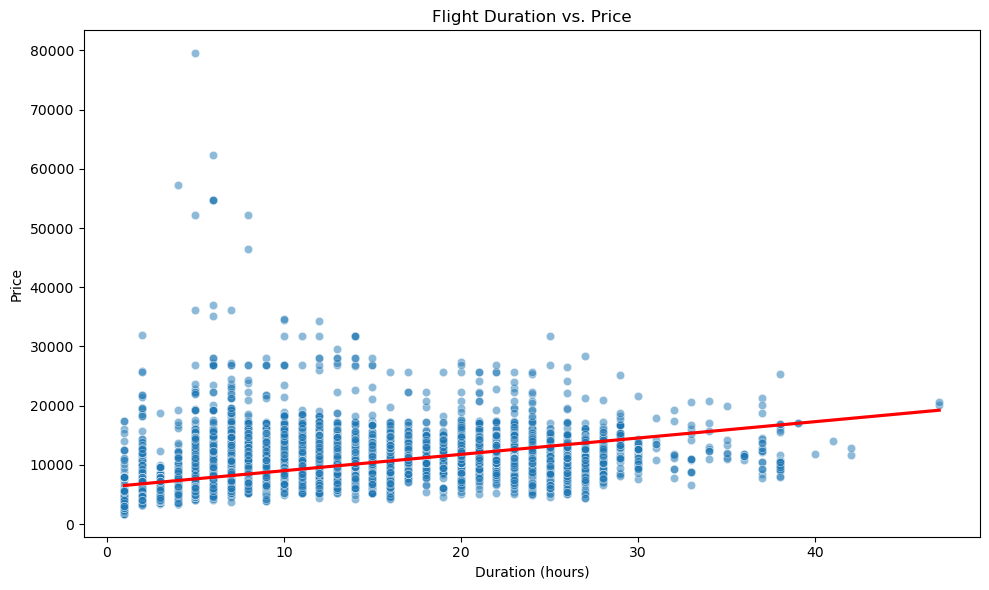

In [90]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_hour', y='Price', data=final_df, alpha=0.5)
sns.regplot(x='duration_hour', y='Price', data=final_df, scatter=False, color='red')
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

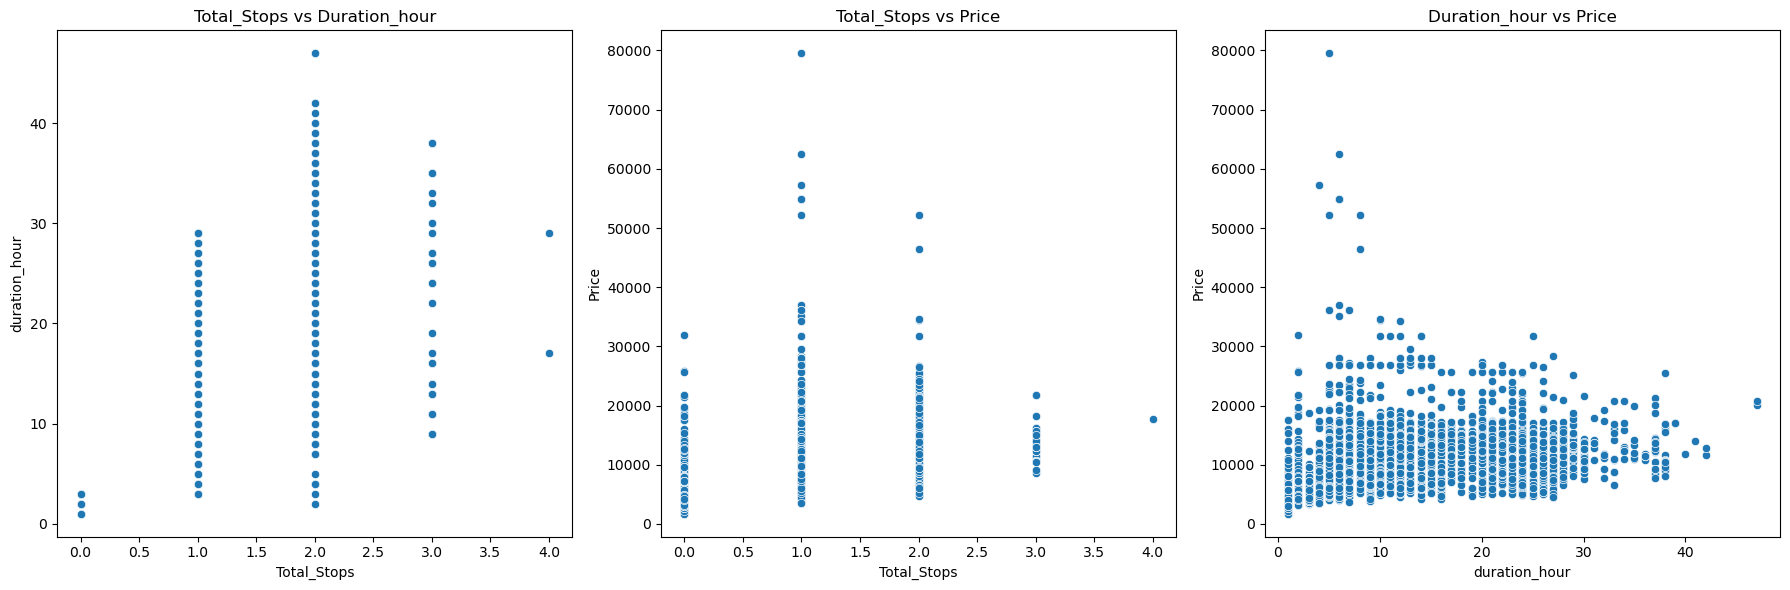

In [68]:
# Create scatter plots for 'Total_Stops' vs 'duration_hour', 'Total_Stops' vs 'Price', and 'duration_hour' vs 'Price'
plt.figure(figsize=(18, 6))

# Scatter plot for 'Total_Stops' vs 'duration_hour'
plt.subplot(1, 3, 1)
sns.scatterplot(x='Total_Stops', y='duration_hour', data=final_df)
plt.title('Total_Stops vs Duration_hour')

# Scatter plot for 'Total_Stops' vs 'Price'
plt.subplot(1, 3, 2)
sns.scatterplot(x='Total_Stops', y='Price', data=final_df)
plt.title('Total_Stops vs Price')

# Scatter plot for 'duration_hour' vs 'Price'
plt.subplot(1, 3, 3)
sns.scatterplot(x='duration_hour', y='Price', data=final_df)
plt.title('Duration_hour vs Price')

plt.tight_layout()
plt.show()

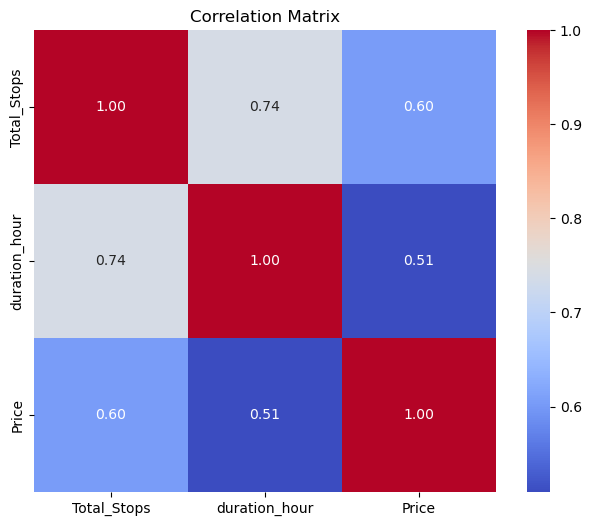

In [69]:
# Calculate the correlation matrix
correlation_matrix = final_df[['Total_Stops', 'duration_hour', 'Price']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [70]:
final_df.isnull().sum()

Total_Stops             1
Price                2670
Date                    0
Month                   0
Year                    0
Arrival_hour            0
Arrival_min             0
Dept_hour               0
Dept_min                0
duration_hour           0
Airline_1               0
Airline_2               0
Airline_3               0
Airline_4               0
Airline_5               0
Airline_6               0
Airline_7               0
Airline_8               0
Airline_9               0
Airline_10              0
Airline_11              0
Source_1                0
Source_2                0
Source_3                0
Source_4                0
Destination_1           0
Destination_2           0
Destination_3           0
Destination_4           0
Destination_5           0
Additional_Info_1       0
Additional_Info_2       0
Additional_Info_3       0
Additional_Info_4       0
Additional_Info_5       0
Additional_Info_6       0
Additional_Info_7       0
Additional_Info_8       0
Additional_I

In [86]:
# Calculate the mode of the 'Total_Stops' column
mode_total_stops = final_df['Total_Stops'].mode()[0]
print(mode_total_stops)

1.0


In [72]:
# Replace null values with the mode
final_df['Total_Stops'] = final_df['Total_Stops'].fillna(mode_total_stops)

In [73]:
final_df.isnull().sum()

Total_Stops             0
Price                2670
Date                    0
Month                   0
Year                    0
Arrival_hour            0
Arrival_min             0
Dept_hour               0
Dept_min                0
duration_hour           0
Airline_1               0
Airline_2               0
Airline_3               0
Airline_4               0
Airline_5               0
Airline_6               0
Airline_7               0
Airline_8               0
Airline_9               0
Airline_10              0
Airline_11              0
Source_1                0
Source_2                0
Source_3                0
Source_4                0
Destination_1           0
Destination_2           0
Destination_3           0
Destination_4           0
Destination_5           0
Additional_Info_1       0
Additional_Info_2       0
Additional_Info_3       0
Additional_Info_4       0
Additional_Info_5       0
Additional_Info_6       0
Additional_Info_7       0
Additional_Info_8       0
Additional_I

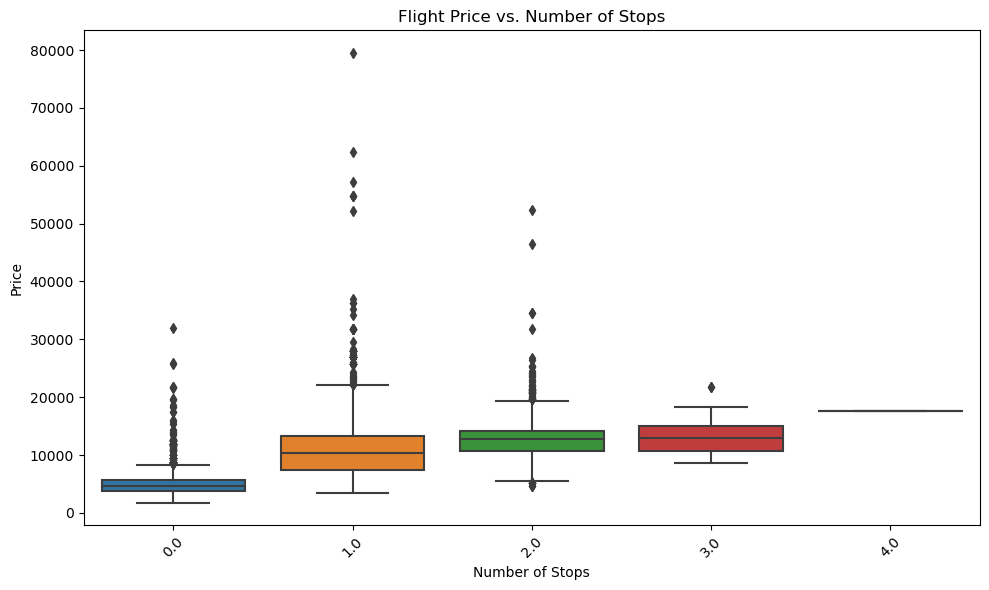

In [79]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Price vs. Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()